In [1]:
from pandas import *
from numpy import *
from sklearn import *
from sklearn.metrics import *
from matplotlib.pyplot import *
# Importing the dataset
dataset = read_csv('kd.csv')
dataset.isnull().any()
ls1=['age','blood_pressure','sg','albumin','su','bgr','bu','Serum_creatinine','sod','pot','Haemoglobin']
mean=dataset.mean(axis=0)
for i in ls1:
    dataset[i]=dataset[i].fillna(mean[i])
dataset.iloc[:,16]=dataset.iloc[:,16].fillna(method='pad')
dataset.iloc[:,17]=dataset.iloc[:,17].fillna(method='pad')
dataset.iloc[:,18]=dataset.iloc[:,18].fillna(method='pad')
dataset['classification']=dataset['classification'].replace('ckd\t','ckd')
dataset['classification'].unique()

C:\Users\DEVIESWAR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\DEVIESWAR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\DEVIESWAR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes a

array(['ckd', 'notckd'], dtype=object)

array([0, 1], dtype=int64)

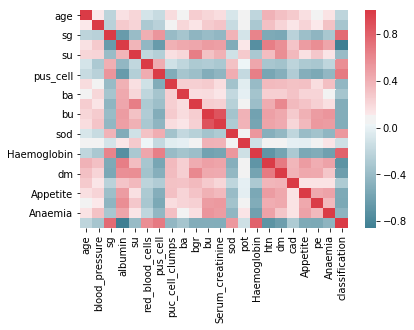

In [2]:
dataset=dataset.dropna(axis=0)
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
ls=[6,7,8,9,19,20,21,22,23,24,25]
for i in ls:   
    dataset.iloc[:,i]=enc.fit_transform(dataset.iloc[:,i])
cor=dataset.iloc[:,1:].corr()
from seaborn import *
cmap=diverging_palette(220,10,as_cmap=True)
heatmap(cor,cmap=cmap,annot=False)
dataset['classification'].unique()

In [3]:
#feature selection
columns = np.full((cor.shape[0],), True, dtype=bool)
for i in range(cor.shape[0]):
    for j in range(i+1, cor.shape[0]):
        if cor.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False
selected_columns = cor.columns[columns]
selected_columns =selected_columns.append(Index(['pus_cell']))
x=dataset[selected_columns]
y=dataset['classification']
area=[]
selected_columns

Index(['age', 'blood_pressure', 'sg', 'albumin', 'su', 'red_blood_cells',
       'puc_cell_clumps', 'ba', 'sod', 'pot', 'cad', 'pus_cell'],
      dtype='object')

C:\Users\DEVIESWAR\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\DEVIESWAR\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DEVIESWAR\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\DEVIESWAR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value 

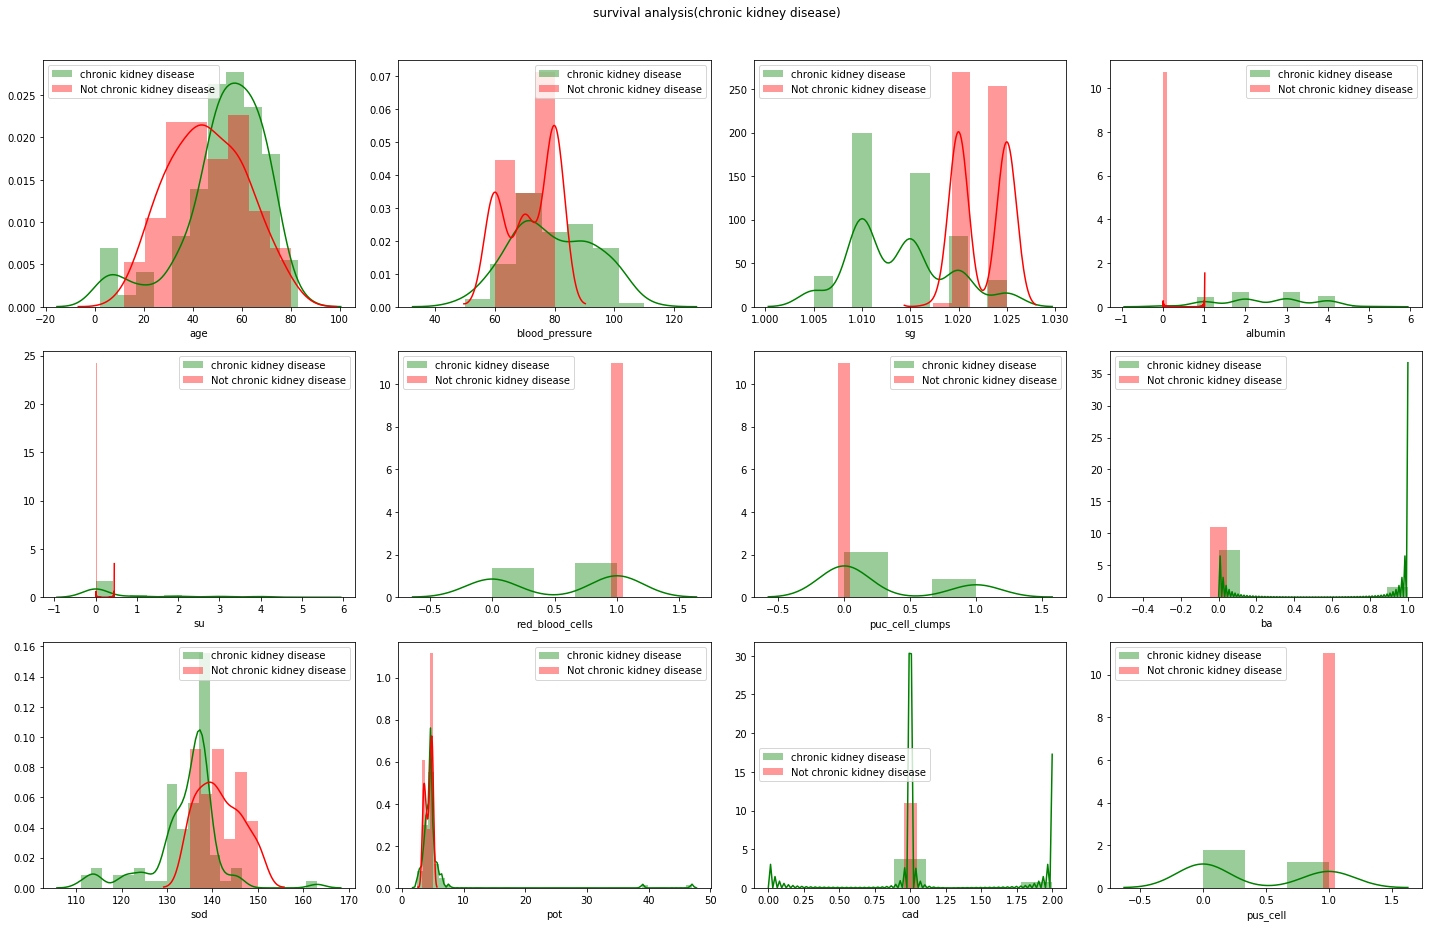

In [4]:
 #data analysis using distribution plot
fig = figure(figsize = (20, 25))
j = 0
for i in x.columns:
    subplot(6, 4, j+1)
    j += 1
    distplot(x[i][dataset['classification']==0], color='g', label = 'chronic kidney disease')
    distplot(x[i][dataset['classification']==1], color='r', label = 'Not chronic kidney disease')
    legend(loc='best')
fig.suptitle('survival analysis(chronic kidney disease)')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
show()

In [5]:
#splitting 
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.375,random_state=0)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

accuracy score: 0.9886363636363636


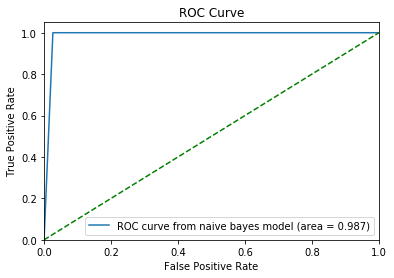

confusion matrix:
 [[37  1]
 [ 0 50]]
                             Precision                     Recall  \
naive bayes  [1.0, 0.9803921568627451]  [0.9736842105263158, 1.0]   

                                            F-score   support  
naive bayes  [0.9866666666666666, 0.99009900990099]  [38, 50]  


In [6]:
#naive Bayes
from sklearn.naive_bayes import GaussianNB 
clas1= GaussianNB()
clas1.fit(x_train,y_train)
y_pred1=clas1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred1)
fpr, tpr, rocnauc = roc_curve(y_test,y_pred1)
print('accuracy score:',accuracy_score(y_test,y_pred1))
roc_auc = auc(fpr, tpr)
figure()    
plot(fpr, tpr, label='ROC curve from '+'naive bayes'+' model (area = %0.3f)' % roc_auc)
plot([0, 1], [0, 1], 'g--')
xlim([0.0, 1.0])
ylim([0.0, 1.05])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('ROC Curve')
legend(loc="lower right")
show()
a6=precision_recall_fscore_support(y_test,y_pred1)
print('confusion matrix:\n',cm1)
c=['Precision','Recall','F-score','support']
df1=DataFrame([a6],index=['naive bayes'],columns=c)
print(df1)

In [7]:
clas1.predict(array([41.000000,80.000000,1.020,0.0,0.0,1,0,0,138.000000,3.9,1,1]).reshape(1,-1))

array([1], dtype=int64)

In [8]:
clas1.predict(array([51.000000,100.000000,1.015,2.0,0.0,1,0,1,146.000000,4.500000,1,1]).reshape(1,-1))

array([0], dtype=int64)